# Трунов Никита
## Билет 0

## 1. Описание датасета и решаемой задачи 

Датасет включает в себя описания гипотетических образцов, соответствующих 23 видам грибов семейства Agaricus и Lepiota. Каждый образец идентифицирован как съедобный или ядовитый. Решаемая задача - задача классифиции.

## 2. Импорты

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import (
    make_scorer, accuracy_score, f1_score, precision_score,
    recall_score, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

## 3. Подготовительный этап

Загружаем датасет в Python.

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Исходный датасет содержит 8124 точек данных и 23 переменные.

In [3]:
df.shape

(8124, 23)

Отсутствующие значения в выборке не обнаружены.

In [4]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Выделяем признаки и целевую переменную.

In [5]:
X = df.drop(columns=['class'])
y = df['class']

Используем способ "One Hot Encoding" для кодирования категориальных признаков.

In [6]:
X = pd.get_dummies(X)

Разделяем выборку на обучающую и тестовую в соотношении 80% и 20%.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

## 4. Обучение моделей

В качестве классификаторов будем использовать логистическую регрессию, метод опорных векторов с гауссовым ядром, k ближайших соседей и многослойных перцептрон.

In [8]:
clfs = (
    LogisticRegression(),
    SVC(probability=True),
    KNeighborsClassifier(),
    MLPClassifier()
)

***Внимание! ROC-AUC строится только для бинарной классификации.***

Построим ROC-кривые и определим прощадь под ними (AUC). Все модели имеют отличные показатели.

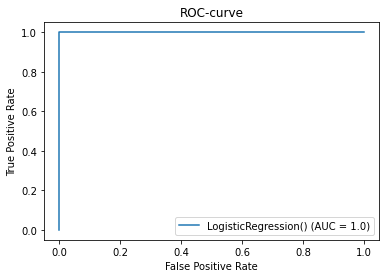

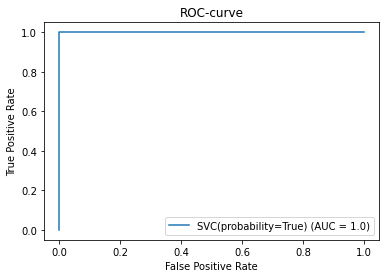

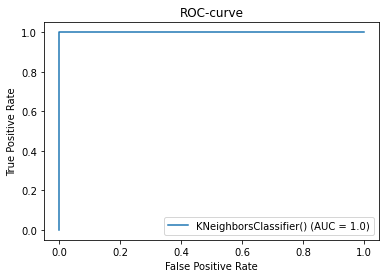

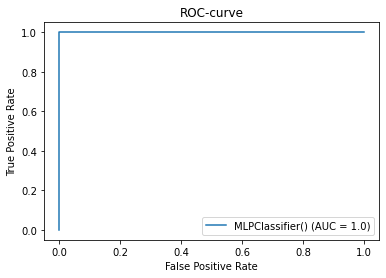

In [9]:
for clf in clfs:
    clf.fit(X_train, y_train)
    fpr, tpr, treshold = roc_curve(
        y_test, clf.predict_proba(X_test)[:, 1], pos_label='p')
    plt.plot(fpr, tpr, label=f'{str(clf)} (AUC = {auc(fpr, tpr)})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.legend()
    plt.show()

В качестве метрик качества будем использовать accuracy, precision, recall и f1.

In [10]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='p'),
    'recall': make_scorer(recall_score, pos_label='p'),
    'f1': make_scorer(f1_score, pos_label='p')
}

Для определения эффективности моделей будем считать усредненные метрики в процессе проведения кросс-валидации. Она необходима, чтобы понимать, насколько полученные метрики валидны и подобрать на их основании наиболее эффективную модель.

In [11]:
scores = {}
for clf in clfs:
    metrics = {
        metric: values.mean()
        for metric, values in cross_validate(
            clf, X_train, y_train, scoring=scoring).items()
    }
    scores[type(clf).__name__] = metrics

Все модели показывают отличные результаты, поэтому в данном случае стоит основываться на времени обучения. Быстрее всего обучилась модель KNeighborsClassifier.

In [12]:
pd.DataFrame(scores)

,LogisticRegression,SVC,KNeighborsClassifier,MLPClassifier
fit_time,0.062802,2.897230,0.011397,0.959801
score_time,0.022198,0.165389,0.204801,0.020799
test_accuracy,1.000000,1.000000,1.000000,1.000000
test_precision,1.000000,1.000000,1.000000,1.000000
test_recall,1.000000,1.000000,1.000000,1.000000
test_f1,1.000000,1.000000,1.000000,1.000000


## 5. Построение итоговой модели

Обучим выбранную модель на тренировочных данных и сделаем предсказание на тестовых данных.

In [13]:
clf = KNeighborsClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

Рассмотрим основные метрики эффективности: accuracy, precision, recall и f1.

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
precision_score(y_test, y_pred, pos_label='p')

1.0

In [16]:
recall_score(y_test, y_pred, pos_label='p')

1.0

In [17]:
f1_score(y_test, y_pred, pos_label='p')

1.0

Наблюдаются отличные метрики, следовательно модель обучена отлично. Обученная модель может быть применима в практических целях.